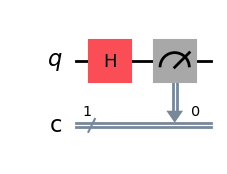

In [1]:
 from qiskit import QuantumCircuit
 qc = QuantumCircuit(1,1)
 qc.h(0)
 qc.measure(0,0)
 qc.draw('mpl')

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
token="",
overwrite=True
)

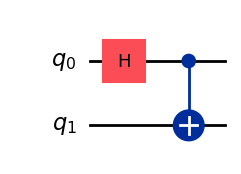

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [6]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [ ]:
# replace Your API Token with your own API token.
%set_env QXToken=
# Make sure there are no whitespace characters between the = and your token. 
# For example, QXToken=123 is valid, but QXToken= 123 is not.

env: QXToken=82gUzvc3VVGOBWZhAZ2GTN3AdDh9wPrBgMklvxCuxGgH


In [7]:
# create an object that is of type QuantumCircuit with two qubits.
circuit = QuantumCircuit(2)

# We will add gates ("operations") to this object below, much like how you may add a series of machines to assembly lines.
circuit.h(0) # add a Hadamard gate to the zeroth qubit (labelling the qubits starts at 0 and goes to 1, 2, ...)
circuit.cx(0, 1) # add a CNOT controlled by the zeroth qubit and applied to the first qubit

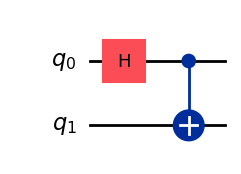

In [8]:
# visualize the circuit below
circuit.draw('mpl')


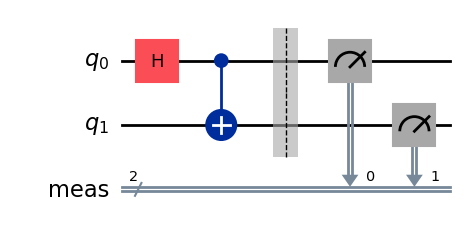

In [9]:
# indicate that you want your quantum circuit to measure all qubits at the end
circuit.measure_all()
# illustrate the circuit with the measurements
circuit.draw('mpl')

In [10]:
# create an instance of the Qiskit StatevectorSampler
sampler = StatevectorSampler()

# run the job on the StatevectorSampler, passing in the circuit. There will be 256 samples taken.
job_sampler = sampler.run([(circuit)], shots=256)

In [11]:
# get the results from the sampler
result_sampler = job_sampler.result()

# to get a dictionary of data mapping {state : number of samples}, we use get_counts()
counts = result_sampler[0].data.meas.get_counts()
print(counts)

{'00': 121, '11': 135}


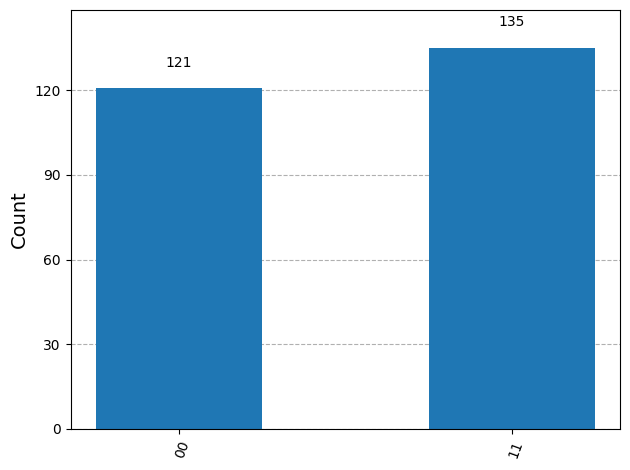

In [12]:
# we can plot these counts to show the distribution of results
plot_histogram(counts)

In [13]:
#transpiling
# redefine the circuit
# create an object that is of type QuantumCircuit with two qubits.
circuit = QuantumCircuit(2)

# apply quantum gates to construct the Bell State
circuit.h(0)
circuit.cx(0, 1)

In [14]:
# set the parameters for generating the transpiler
backend = FakeSherbrooke()
optimization_level = 1 # for a description of optimization levels, visit: https://docs.quantum.ibm.com/api/qiskit/transpiler#optimization-stage

C:\Users\ashra\miniconda3\envs\quantum\lib\site-packages\qiskit\utils\lazy_tester.py:321: OptionalDependencyImportWarning: While trying to import 'Qiskit Aer', some components were located but raised other errors during import. You might have an incompatible version installed. Qiskit will continue as if the optional is not available.
 - module 'qiskit_aer' failed to import with: ImportError("cannot import name 'ProviderV1' from 'qiskit.providers' (C:\\Users\\ashra\\miniconda3\\envs\\quantum\\lib\\site-packages\\qiskit\\providers\\__init__.py)")
  warnings.warn(message, category=OptionalDependencyImportWarning)


In [15]:
# generate the pass manager with these parameters
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

# transpile the circuit
transpiled_circuit = pass_manager.run(circuit)

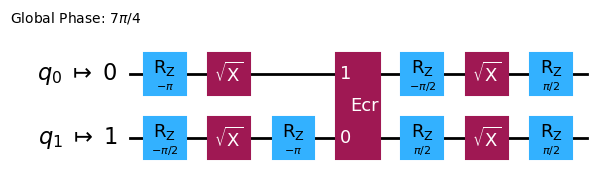

In [16]:
# visualize the transpiled circuit
transpiled_circuit.draw('mpl', idle_wires=False,)

In [17]:
# Z operator on 0, Z operator on 1
ZZ = SparsePauliOp('ZZ')
# Z operator on 0, I operator on 1
ZI = SparsePauliOp('ZI')
IX = SparsePauliOp('IX')
XI = SparsePauliOp('XI')
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')

observables = [
    SparsePauliOp('IZ'),
    SparsePauliOp('IX'),
    SparsePauliOp('ZI'),
    SparsePauliOp('XI'),
    SparsePauliOp('ZZ'),
    SparsePauliOp('XX')
]

data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']

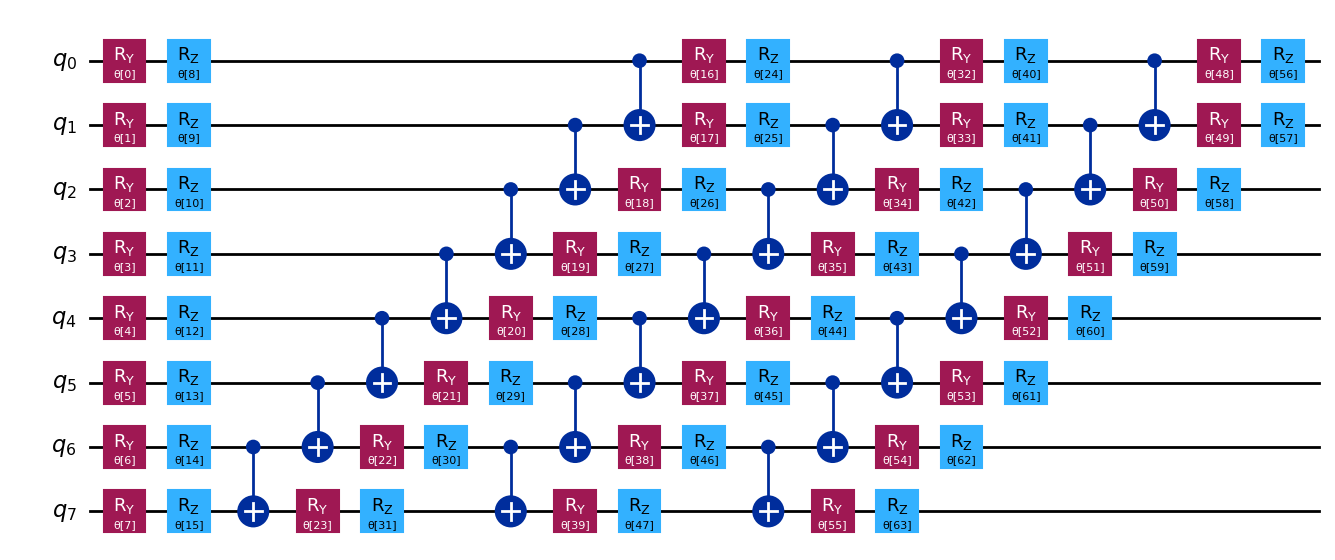

In [18]:
from qiskit.circuit.library import efficient_su2
 
n_qubits = 8
circuit = efficient_su2(n_qubits)
circuit.draw("mpl")